# Week 11 handin

# Exercise1:

## 1) Load datasetet digits fra sklearn load_digits

a) Plot a digit [0] as an image.

plt.gray()

plt.matshow(digits.images[0])


## 2) Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.

a) Hint, use the following link

https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_dim_reduction.html#sphx-glr-auto-examples-neighbors-plot-nca-dim-reduction-py

b) Make the model

c) Train the model

d) Check accuracy of the data dimensionality reduction, using KNN

e) Show the scatterplot


## 3) Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.

a) Use numpy to print all the unique cluster labels_

a.1) Note that we have the same amount of labels, as we did clusters in different collors from the previous task

b) Scatter plot meanshift output, including the cluster centers

Made by:
Lucky drawing

## 02 Status

Completed All Tasks in excercise 1

## Solutions


## Exercise 1

### Task 1

Load datasetet digits fra sklearn load_digits

a) Plot a digit [0] as an image.

plt.gray()

plt.matshow(digits.images[0])

<class 'numpy.ndarray'>
(1797, 64)


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

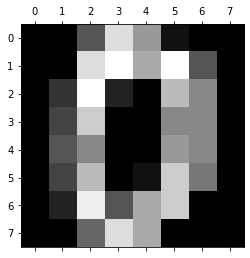

In [32]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

digits = load_digits()
print(type(digits.data))
print(digits.data.shape)

plt.gray()
plt.figure(figsize=(10,10))
plt.matshow(digits.images[0])

### Task 2

Do dimensionality reduction with NCA neighbourhood components analysis and standard scalar.

a) Hint, use the following link

b) Make the model

c) Train the model

d) Check accuracy of the data dimensionality reduction, using KNN

e) Show the scatterplot

0.8422222222222222


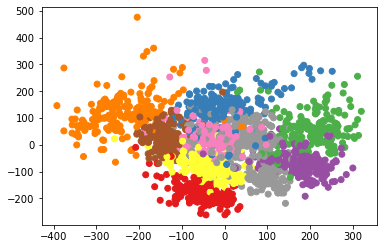

In [30]:
import sklearn as skl
import sklearn.pipeline as sklp

data1, data2 = load_digits(return_X_y=True)

sklmodel = sklp.make_pipeline(skl.preprocessing.StandardScaler(), skl.neighbors.NeighborhoodComponentsAnalysis(n_components=2, random_state=0))

sklmodel.fit(data1, data2)

data_embedded = sklmodel.transform(data1)

X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(
    data1, data2, random_state=1)

neighbors = skl.neighbors.KNeighborsClassifier(n_neighbors=5)

neighbors.fit(sklmodel.transform(X_train), y_train)

print(neighbors.score(sklmodel.transform(X_test), y_test))

plt.scatter(data_embedded[:,0], data_embedded[:, 1], c=data2, cmap='Set1')




### Task 3

Use MeanShift with Bandwith=80 and fit it with the reduced dimensionality data from exercise 2.

Use numpy to print all the unique cluster labels_

Note that we have the same amount of labels, as we did clusters in different colors from the previous task

Scatter plot meanshift output, including the cluster centers

[0 1 2 3 4 5 6 7 8]


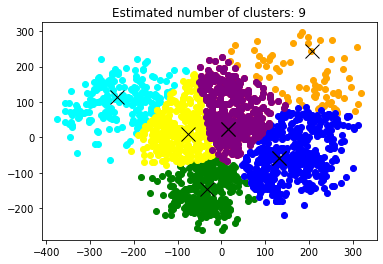

In [42]:
import numpy as np

meandata = skl.cluster.MeanShift(bandwidth=80)
meandata.fit(data_embedded)

packs = meandata.labels_
print(np.unique(packs))

color = ["green","red", "orange", "pink", "cyan", "blue", "yellow", "purple"]
for value, color in zip(packs, color):
    pic = packs == value
    centerpoint = meandata.cluster_centers_[value]
    plt.scatter(data_embedded[pic, 0], data_embedded[pic, 1], c=color)
    plt.plot(centerpoint[0], centerpoint[1], 'x', markerfacecolor=color,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % len(meandata.cluster_centers_))
plt.show()